### Janet Illescas Coria

# Práctica 4

## Transformada discreta de Fourier en 2D y Filtrado en el espacio de la frecuencia

In [1]:
# Bibliotecas para la manipulación de imágenes, matrices, crear
# números aleatorios y el manejo de archivos y directorios.
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import os


In [2]:
# Configuración de pyplot para ver las imágenes en escala de grises.
plt.rcParams['image.cmap'] = 'gray'
# Comando de Jupyter para que las imágenes se muestren automaticamente.
%matplotlib inline

In [3]:
# Obtiene la imagen de la dirección recibida.
def obtener_img(img):
    try: 
        # Verificamos si el archivo existe en la dirección recibida, si 
        # no existe lanzamos una excepción.
        if not os.path.exists(img):
            raise TypeError('No existe el archivo')
            
        # Terminaciones permitidas
        terminaciones = ['.png', '.jpg', '.tif', '.tiff', '.bmp']
        
        # Verificamos si el archivo es png, jpg, tif, tiff o bmp
        for term in terminaciones:
            if img.endswith(term):
                
                # Leemos la imagen.
                img = io.imread(img)
        
                # Regresamos la imagen como un arreglo numpy (matriz).
                return img
            
        # Al no ser un archivo permitido lanzamos una excepción.
        raise TypeError('El archivo debe ser png, jpg, tif o tiff')
    
    except TypeError as e:
        print(f"TypeError: {e}")

In [4]:
# Función que suma pixel a pixel dos imágenes recibidas, las cuales 
# deben ser del mismo tamaño.
def suma_imagenes(img1, img2):
    try:
        if not isinstance(img1, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img1.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(img2, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img2.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if img1.shape != img2.shape:
            raise TypeError('Las imágenes deben ser del mismo tamaño') 
            
        nueva_img = np.zeros(img1.shape)
        for y in range(0, img1.shape[0]):
            for x in range(0, img1.shape[1]):
                sum = img1[y][x] + img2[y][x]
                nueva_img[y][x] = sum #limita_p(sum)
                
        return nueva_img
        
    except TypeError as e:
        print(f"TypeError: {e}")

In [5]:
# Función que generar ruido sal y pimienta en la imagen recibida, 
# utlizando un porcentaje para definir la probabilidad de ruido
def ruido_sal_pim(img, porcentaje = 0.05):
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if not isinstance(porcentaje, int) and not isinstance(porcentaje, float):
            raise TypeError('El porcentaje debe ser de tipo numérico')
        if porcentaje < 0:
            raise TypeError('El porcentaje debe ser un número positivo')
            
        img_s_p = np.copy(img)
        num_pixeles = img.shape[0] * img.shape[1] * porcentaje
        
        for i in range(int(num_pixeles // 2)):
            y = np.random.randint(0, img.shape[0])
            x = np.random.randint(0, img.shape[1])
            img_s_p[y][x] = 0
            
        for i in range(int(num_pixeles // 2)):
            y = np.random.randint(0, img.shape[0])
            x = np.random.randint(0, img.shape[1])
            img_s_p[y][x] = 255
        
        return img_s_p
    
    except TypeError as e:
            print(f"TypeError: {e}")

#### 1. Calcular la tranformada discrerta de Fourier a la imagen de SR. Fourier y generar el ejemplo visto del libro Castleman, 1996, figura 10.10.

In [6]:
# Función para aplicar la transformada de Fourier a la imagen recibida y 
# el filtro H, si es que se recibe alguno.
# Regresa la amplitud, la fase, la amplitud con corrimiento, la fase
# con corrimiento, la transformada inversa, la transformada inversa
# sólo con amplitud, la transformada inversa sólo con fase y el filtro 
# aplicado a la transformada.
def transf_fourier(img, H = None):
    
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional') 
        if H is not None:
            if not isinstance(H, np.ndarray):
                raise TypeError('El filtro debe ser instancia de numpy.ndarray')
            if len(H.shape) != 2:
                raise TypeError('El filtro debe ser un arreglo bidimensional') 
            if img.shape != H.shape:
                raise TypeError('El filtro debe ser del mismo tamaño que la imagen') 
    
    
        # Transformación en frecuencia
        
        tf = (img)
        ctf = np.fft.fftshift(tf)
        
        magnitud = abs(tf)
        amplitud = np.log(1+magnitud)
        cmagnitud = abs(ctf)
        camplitud = np.log(1+cmagnitud)
        
        fase = np.angle(tf)
        cfase = np.angle(ctf)
        
        # Aplicación del filtro H
        
        if H is not None:
            ctf = ctf * H
    
        # Transformación en espacio
        
        iamplitud = np.fft.ifft2(magnitud)
        iamplitud = abs(iamplitud)
        
        icfase = np.fft.ifft2(np.exp(fase * 1j))
        ifase = abs(icfase)
        
        itf = np.fft.ifft2(ctf)
        itf = abs(itf)
    
        return [amplitud, fase, camplitud, cfase, itf, iamplitud, ifase, ctf]
    
    except TypeError as e:
        print(f"TypeError: {e}")

In [7]:
fourier = obtener_img('imagenes/fourier_bw512.bmp')
fourier_tf = transf_fourier(fourier)

a) La versión sin corrimineto de la amplitud y la fase de la imagen de entrada I.

<Figure size 640x480 with 0 Axes>

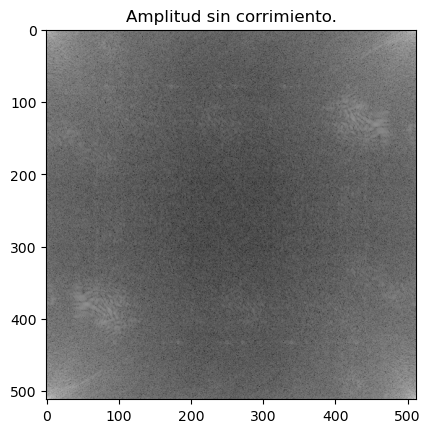

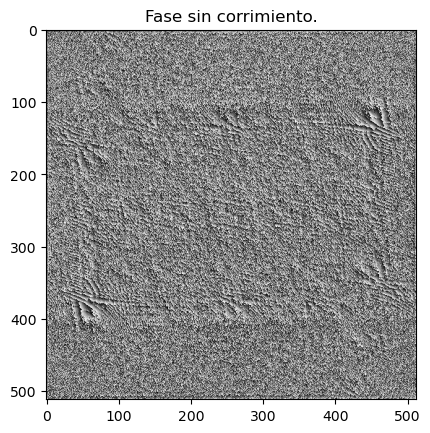

<Figure size 640x480 with 0 Axes>

In [8]:
plt.imshow(fourier_tf[0])
plt.title('Amplitud sin corrimiento.')
plt.figure()

plt.imshow(fourier_tf[1])
plt.title('Fase sin corrimiento.')
plt.figure()

b) La versión con corrimiento de la amplitud y la fase de la imagen de entrada I.

<Figure size 640x480 with 0 Axes>

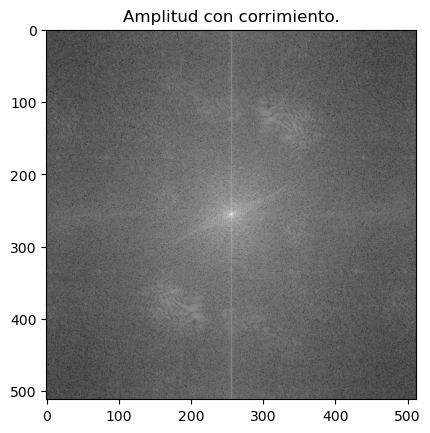

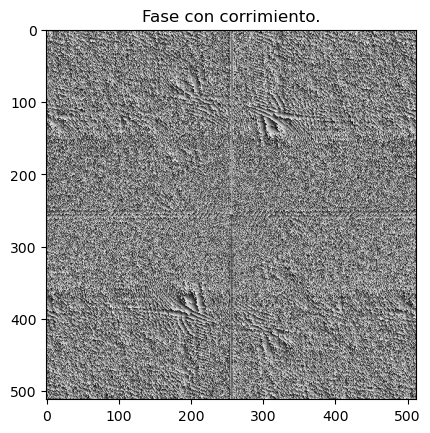

<Figure size 640x480 with 0 Axes>

In [9]:
plt.imshow(fourier_tf[2])
plt.title('Amplitud con corrimiento.')
plt.figure()

plt.imshow(fourier_tf[3])
plt.title('Fase con corrimiento.')
plt.figure()

c) Regresar con la transformada inversa completa a la imagen original.

<Figure size 640x480 with 0 Axes>

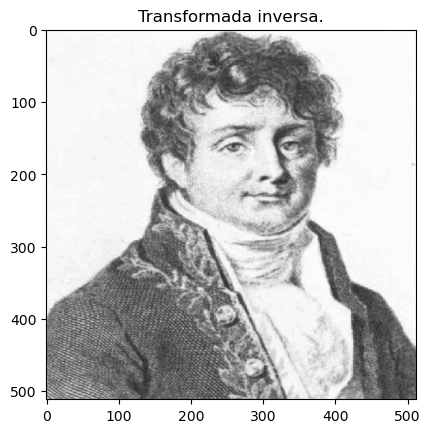

<Figure size 640x480 with 0 Axes>

In [10]:
plt.imshow(fourier_tf[4], vmin=0, vmax=255)
plt.title('Transformada inversa.')
plt.figure()

d) Regresar con la transformada inversa sólo con amplitud

<Figure size 640x480 with 0 Axes>

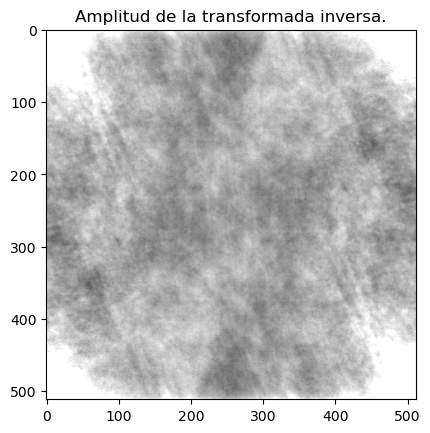

<Figure size 640x480 with 0 Axes>

In [11]:
plt.imshow(fourier_tf[5], vmin = 0, vmax = 255)
plt.title('Amplitud de la transformada inversa.')
plt.figure()

e) Regresar con la transformada inversa sólo con la fase.

<Figure size 640x480 with 0 Axes>

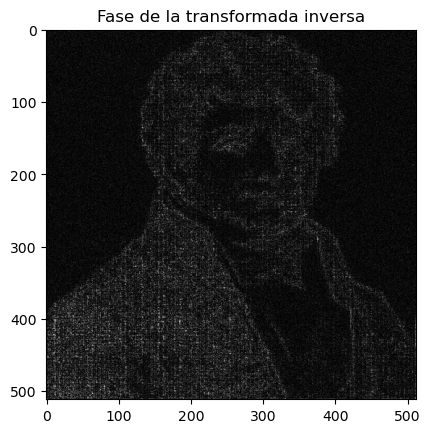

<Figure size 640x480 with 0 Axes>

In [12]:
plt.imshow(fourier_tf[6])
plt.title('Fase de la transformada inversa')
plt.figure()

#### 2. Aplicar a una imagen sin ruido y la misma imagen con ruido sal y pimenta filtros de suavizamiento y realice.

In [47]:
# Función para aplicar el filtro butterworth a la imagen recibida con la 
# frecuencia de corte d0 y el orden n que sean indicados. Por defecto se
# aplicará el filtro paso bajas, pero si se indica que es de tipo 2 se 
# aplicará el filtro paso altas.
# Regresa el filtro, el filtro aplicado a la transformada de fourier y la 
# imagen resultante.
def filtro_butterworth(img, d0, n, tipo = 1):
    
    try:
        if not isinstance(img, np.ndarray):
            raise TypeError('La imagen debe ser instancia de numpy.ndarray')
        if len(img.shape) != 2:
            raise TypeError('La imagen debe ser un arreglo bidimensional')
        if not isinstance(d0, int):
            raise TypeError('D0 debe ser un entero')
        if not isinstance(n, int):
            raise TypeError('n debe ser un entero')
        if tipo != 1 and tipo != 2:
            raise TypeError('Tipo no reconocido, paso bajas es tipo 1 y paso bajas es tipo 2')
        
    
        c, r = img.shape
        xs = np.arange(r)
        ys = np.arange(c)
        xs, ys = np.meshgrid(xs, ys)
        forma = np.sqrt((xs-(r/2))**2 + (ys-(c/2))**2)
        d = 1 + (forma/d0)** (2*n)
        filtro = 1/d
        if tipo == 2:
            filtro = 1 - filtro
        
        tf = transf_fourier(img, filtro)
        img_tf = tf[4]
        htf = abs(tf[7])
        htf = np.log(1 + htf)
    
        return [filtro, htf, img_tf]

    except TypeError as e:
        print(f"TypeError: {e}")

Text(0.5, 1.0, 'Amplitud de la transformada inversa')

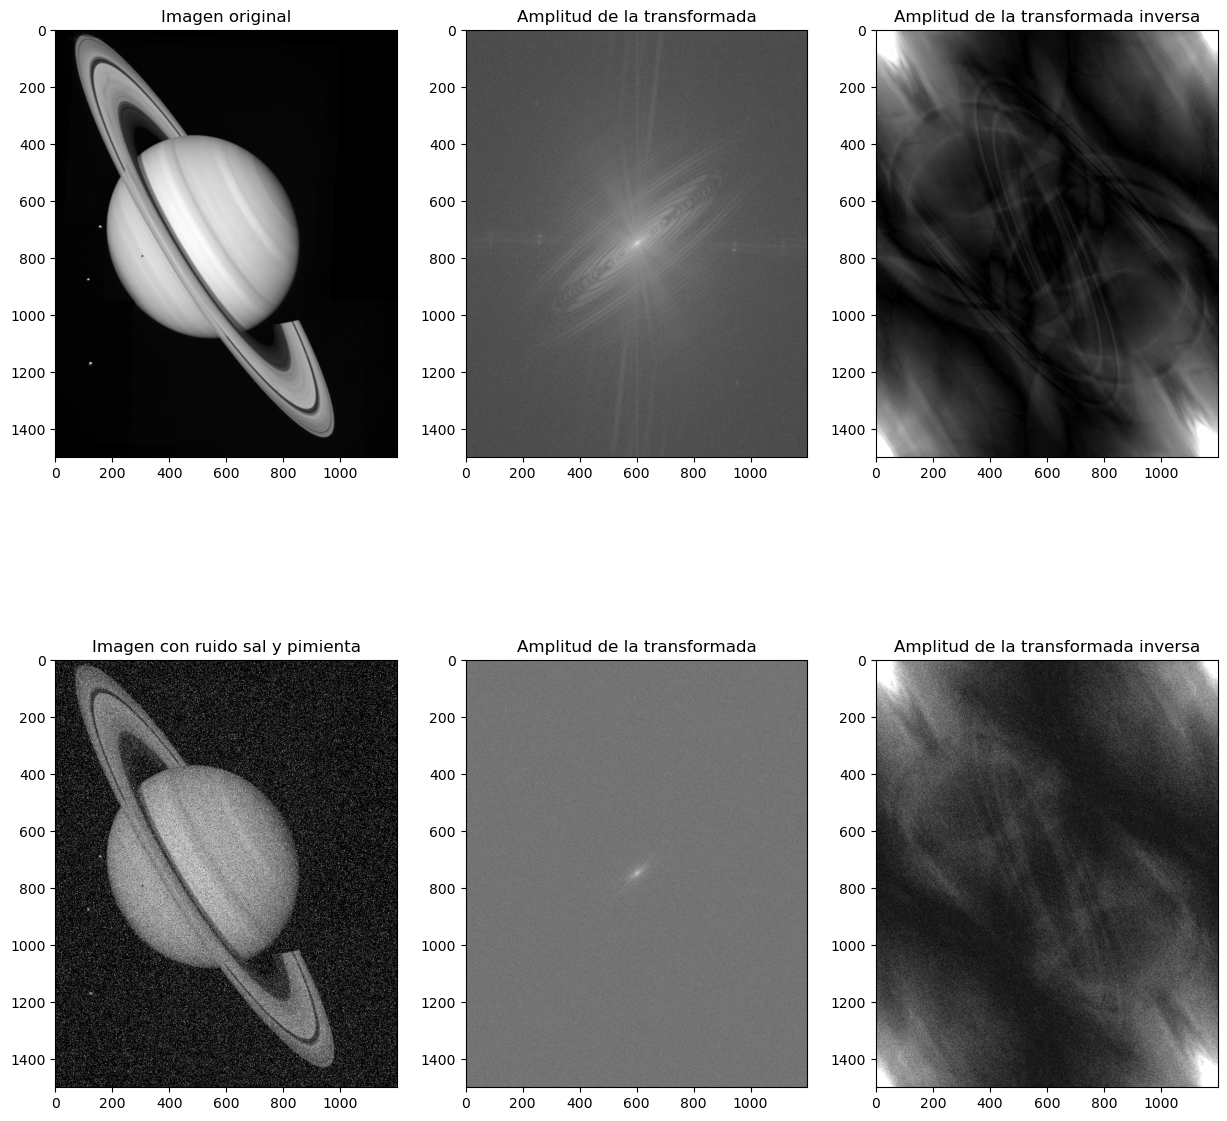

In [49]:
saturno = obtener_img('imagenes/saturn_bw.tif')
a_tf_s = transf_fourier(saturno)[2]
a_itf_s = transf_fourier(saturno)[5]

img_sp = ruido_sal_pim(saturno, 0.2)
a_tf_sp = transf_fourier(img_sp)[2]
a_itf_sp = transf_fourier(img_sp)[5]

plt.figure(figsize=(15, 15))

plt.subplot(2,3,1)
plt.imshow(saturno)
plt.title('Imagen original')

plt.subplot(2,3,2)
plt.imshow(a_tf_s)
plt.title('Amplitud de la transformada')

plt.subplot(2,3,3)
plt.imshow(a_itf_s, vmin = 0, vmax = 255)
plt.title('Amplitud de la transformada inversa')

plt.subplot(2,3,4)
plt.imshow(img_sp)
plt.title('Imagen con ruido sal y pimienta')

plt.subplot(2,3,5)
plt.imshow(a_tf_sp)
plt.title('Amplitud de la transformada')

plt.subplot(2,3,6)
plt.imshow(a_itf_sp, vmin = 0, vmax = 255)
plt.title('Amplitud de la transformada inversa')


a) Aplicar el filtro paso bajas Butterworth, para eliminación de ruido. Prueba para varios valores de frecuencia de corte D0 y para varios valores de orden n y establece cuales valores son mejores para la imagen en cuestión. Realiza el ejercicio para la imagen con y sin ruido.

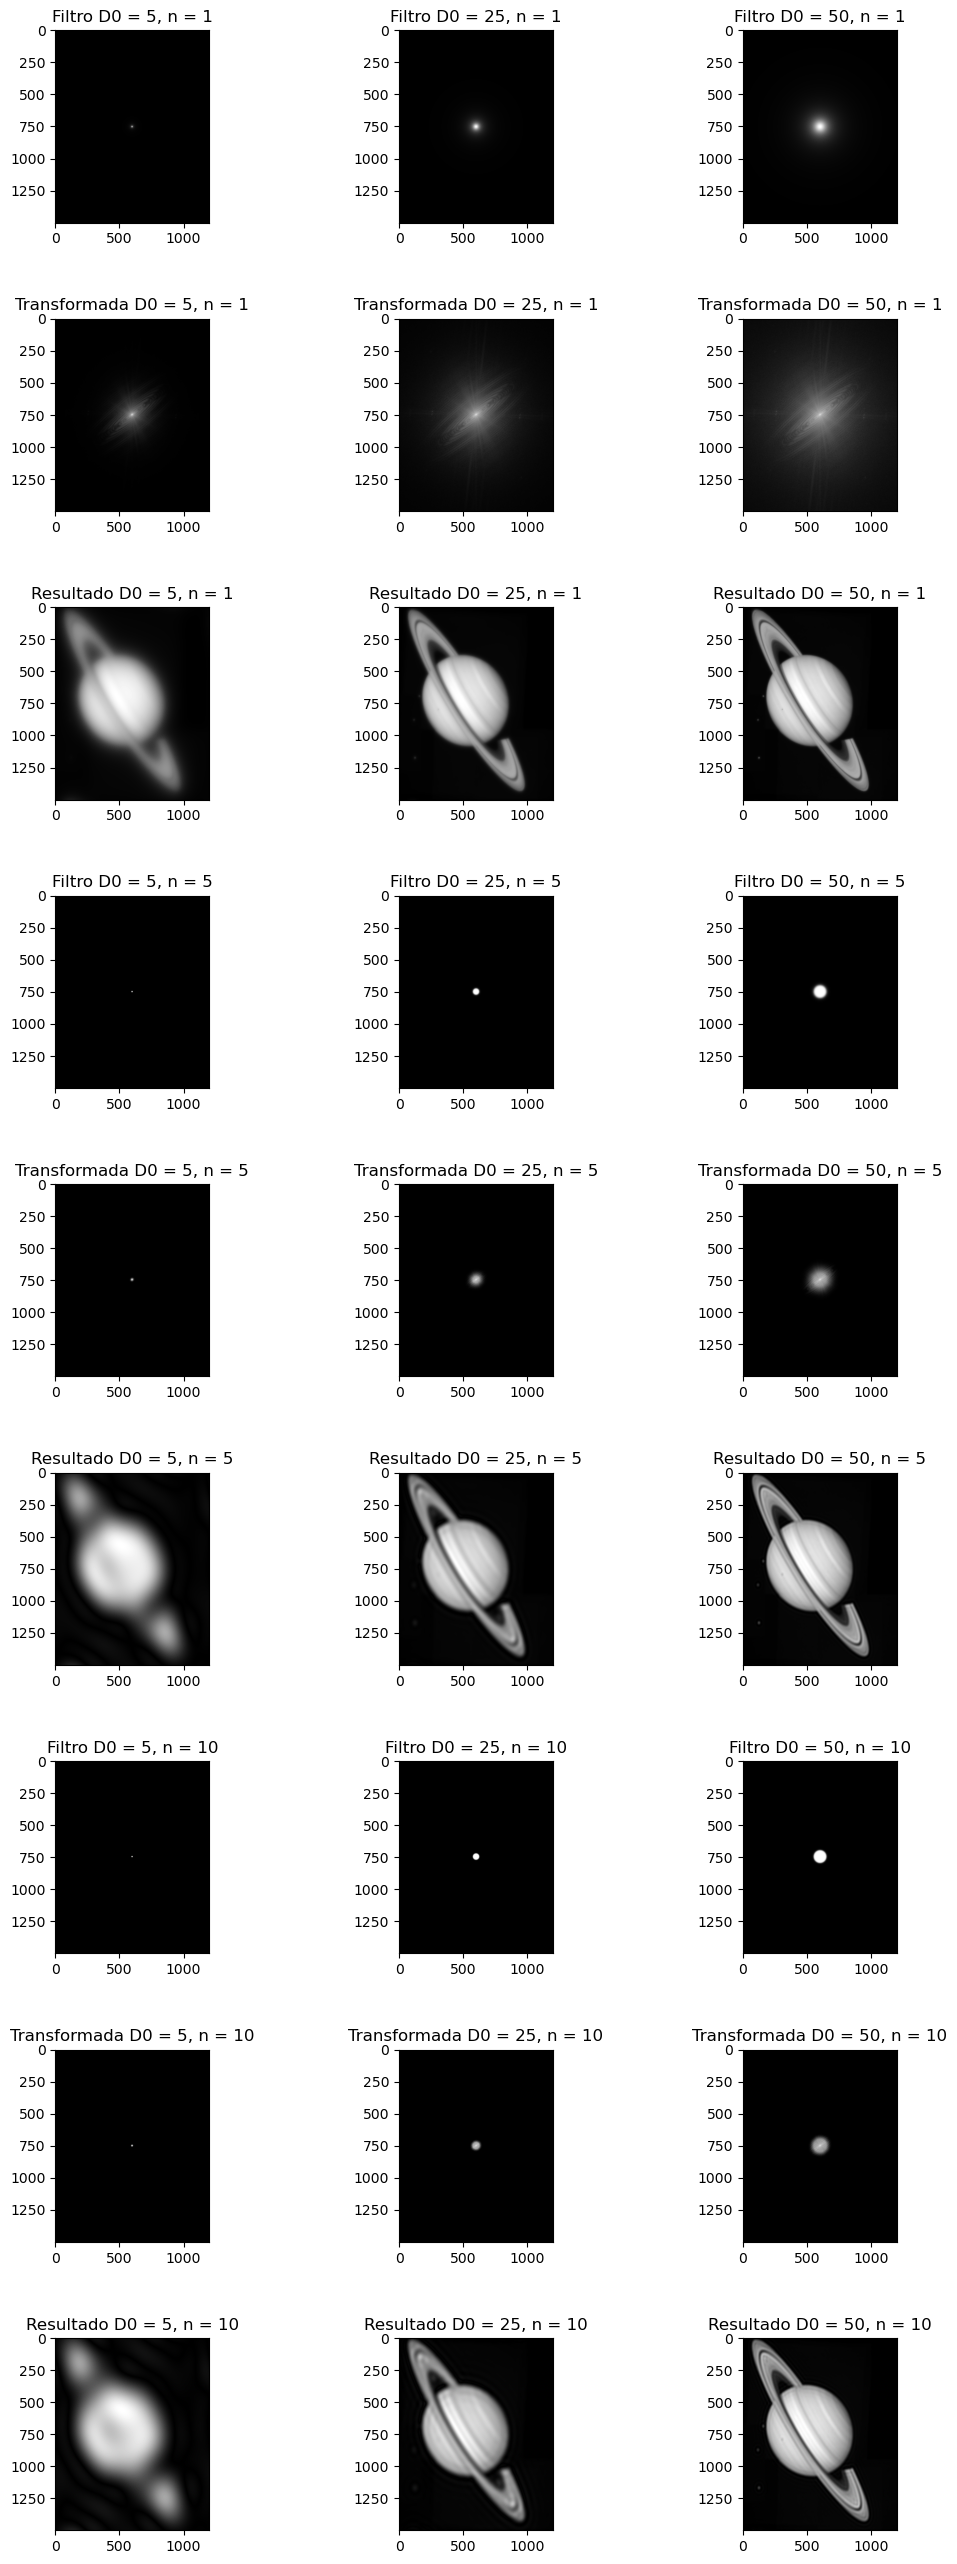

In [56]:
plt.figure(figsize=(50, 50))

img_bw_pb_5_1 = filtro_butterworth(saturno, 5, 1)
img_bw_pb_25_1 = filtro_butterworth(saturno, 25, 1)
img_bw_pb_50_1 = filtro_butterworth(saturno, 50, 1)

img_bw_pb_5_5 = filtro_butterworth(saturno, 5, 5)
img_bw_pb_25_5 = filtro_butterworth(saturno, 25, 5)
img_bw_pb_50_5 = filtro_butterworth(saturno, 50, 5)

img_bw_pb_5_10 = filtro_butterworth(saturno, 5, 10)
img_bw_pb_25_10 = filtro_butterworth(saturno, 25, 10)
img_bw_pb_50_10 = filtro_butterworth(saturno, 50, 10)

plt.subplot(9,3,1)
plt.imshow(img_bw_pb_5_1[0])
plt.title('Filtro D0 = 5, n = 1')

plt.subplot(9,3,2)
plt.imshow(img_bw_pb_25_1[0])
plt.title('Filtro D0 = 25, n = 1')

plt.subplot(9,3,3)
plt.imshow(img_bw_pb_50_1[0])
plt.title('Filtro D0 = 50, n = 1')

plt.subplot(9,3,4)
plt.imshow(img_bw_pb_5_1[1])
plt.title('Transformada D0 = 5, n = 1')

plt.subplot(9,3,5)
plt.imshow(img_bw_pb_25_1[1])
plt.title('Transformada D0 = 25, n = 1')

plt.subplot(9,3,6)
plt.imshow(img_bw_pb_50_1[1])
plt.title('Transformada D0 = 50, n = 1')

plt.subplot(9,3,7)
plt.imshow(img_bw_pb_5_1[2])
plt.title('Resultado D0 = 5, n = 1')

plt.subplot(9,3,8)
plt.imshow(img_bw_pb_25_1[2])
plt.title('Resultado D0 = 25, n = 1')

plt.subplot(9,3,9)
plt.imshow(img_bw_pb_50_1[2])
plt.title('Resultado D0 = 50, n = 1')

plt.subplot(9,3,10)
plt.imshow(img_bw_pb_5_5[0])
plt.title('Filtro D0 = 5, n = 5')

plt.subplot(9,3,11)
plt.imshow(img_bw_pb_25_5[0])
plt.title('Filtro D0 = 25, n = 5')

plt.subplot(9,3,12) 
plt.imshow(img_bw_pb_50_5[0])
plt.title('Filtro D0 = 50, n = 5')

plt.subplot(9,3,13)
plt.imshow(img_bw_pb_5_5[1])
plt.title('Transformada D0 = 5, n = 5')

plt.subplot(9,3,14)
plt.imshow(img_bw_pb_25_5[1])
plt.title('Transformada D0 = 25, n = 5')

plt.subplot(9,3,15)
plt.imshow(img_bw_pb_50_5[1])
plt.title('Transformada D0 = 50, n = 5')

plt.subplot(9,3,16)
plt.imshow(img_bw_pb_5_5[2])
plt.title('Resultado D0 = 5, n = 5')

plt.subplot(9,3,17)
plt.imshow(img_bw_pb_25_5[2])
plt.title('Resultado D0 = 25, n = 5')

plt.subplot(9,3,18)
plt.imshow(img_bw_pb_50_5[2])
plt.title('Resultado D0 = 50, n = 5')

plt.subplot(9,3,19)
plt.imshow(img_bw_pb_5_10[0])
plt.title('Filtro D0 = 5, n = 10')

plt.subplot(9,3,20)
plt.imshow(img_bw_pb_25_10[0])
plt.title('Filtro D0 = 25, n = 10')

plt.subplot(9,3,21)
plt.imshow(img_bw_pb_50_10[0])
plt.title('Filtro D0 = 50, n = 10')

plt.subplot(9,3,22)
plt.imshow(img_bw_pb_5_10[1])
plt.title('Transformada D0 = 5, n = 10')

plt.subplot(9,3,23)
plt.imshow(img_bw_pb_25_10[1])
plt.title('Transformada D0 = 25, n = 10')

plt.subplot(9,3,24)
plt.imshow(img_bw_pb_50_10[1])
plt.title('Transformada D0 = 50, n = 10')

plt.subplot(9,3,25)
plt.imshow(img_bw_pb_5_10[2])
plt.title('Resultado D0 = 5, n = 10')

plt.subplot(9,3,26)
plt.imshow(img_bw_pb_25_10[2])
plt.title('Resultado D0 = 25, n = 10')

plt.subplot(9,3,27)
plt.imshow(img_bw_pb_50_10[2])
plt.title('Resultado D0 = 50, n = 10')

plt.subplots_adjust(left=0.1, right=0.3, bottom=0.1, top=0.6, wspace=0.1, hspace=0.5)

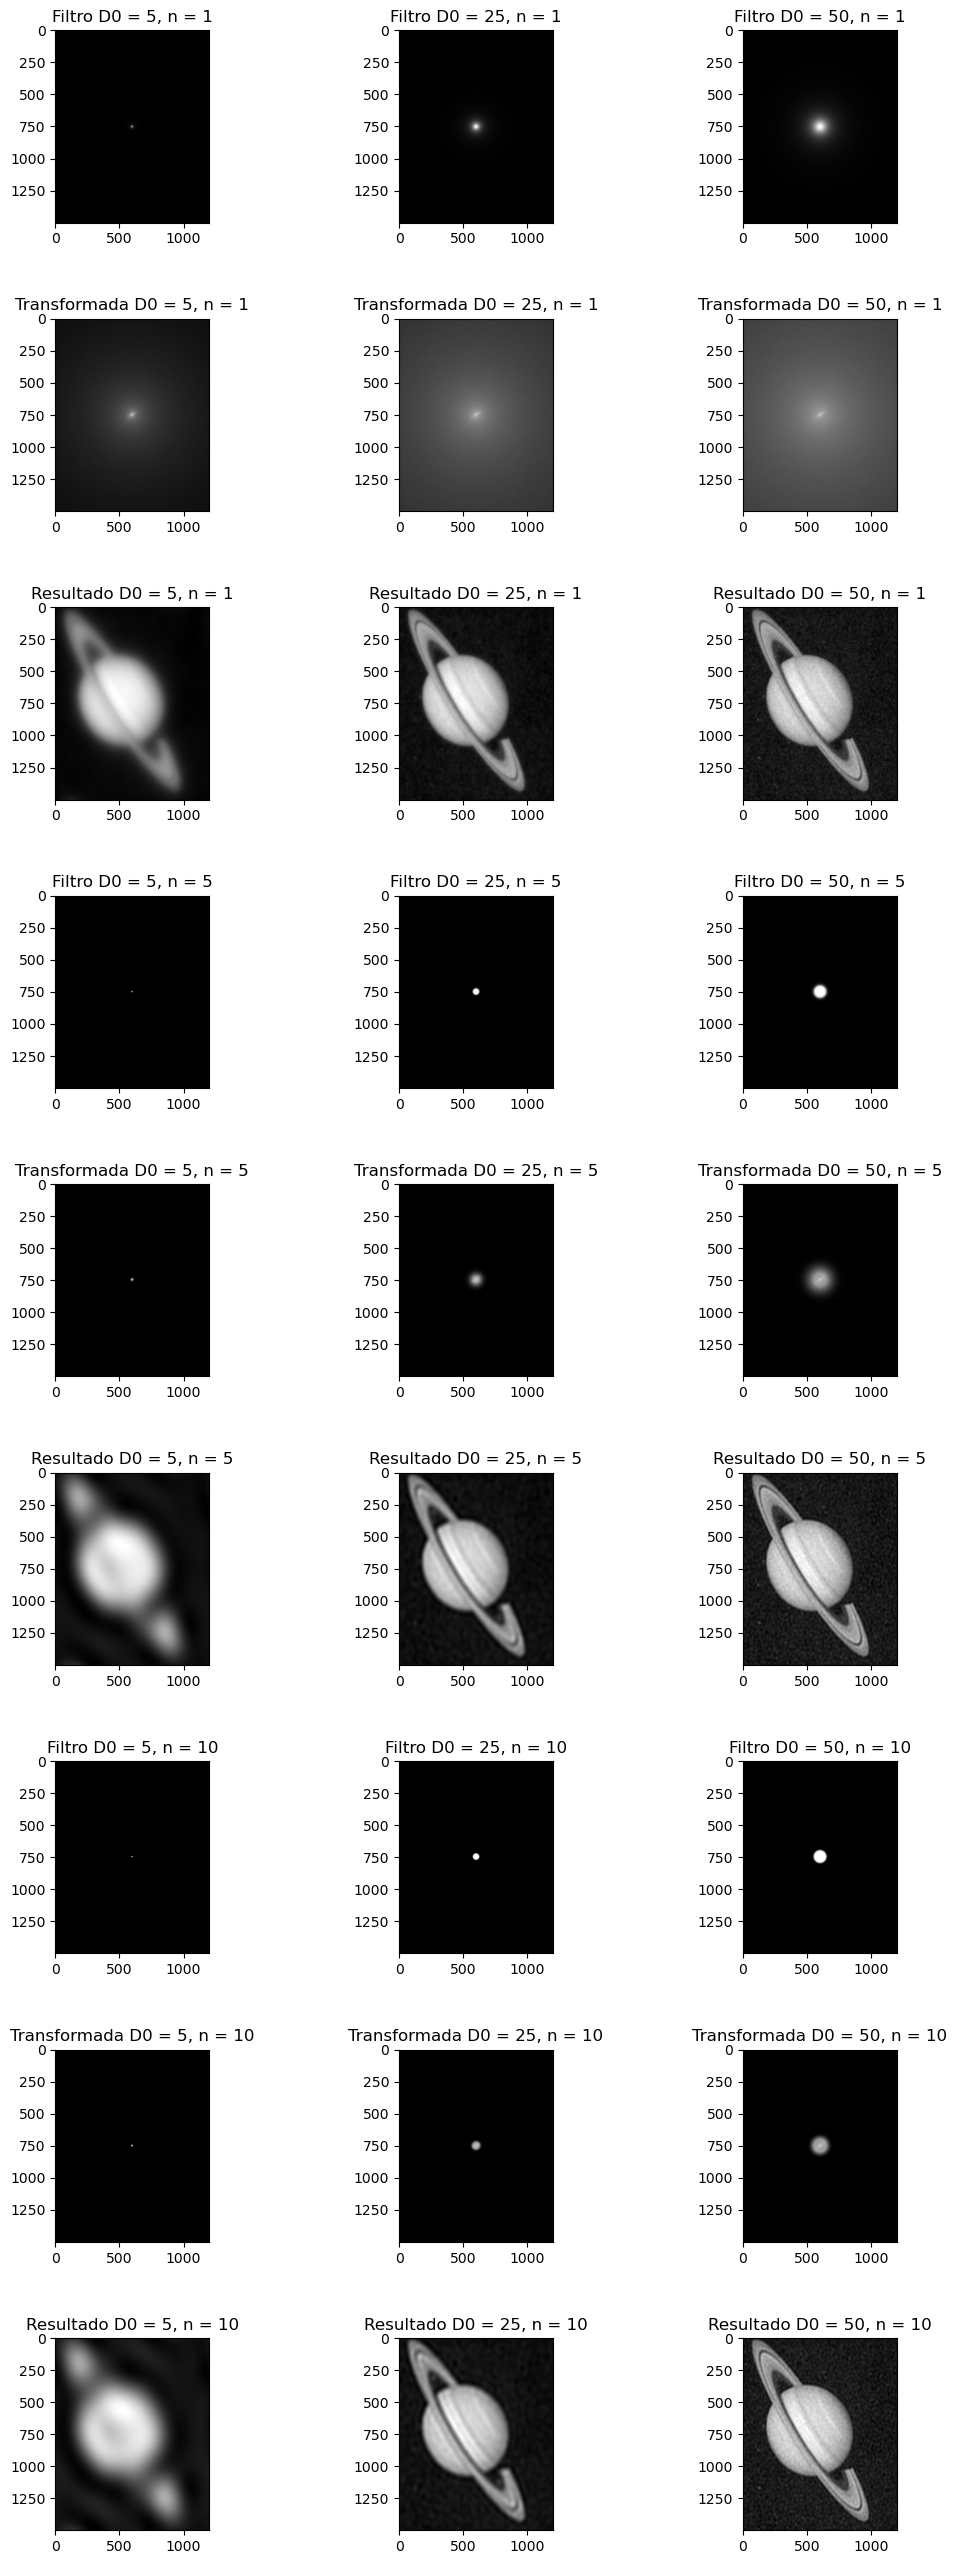

In [57]:
plt.figure(figsize=(50, 50))

img_bw_pb_5_1 = filtro_butterworth(img_sp, 5, 1)
img_bw_pb_25_1 = filtro_butterworth(img_sp, 25, 1)
img_bw_pb_50_1 = filtro_butterworth(img_sp, 50, 1)

img_bw_pb_5_5 = filtro_butterworth(img_sp, 5, 5)
img_bw_pb_25_5 = filtro_butterworth(img_sp, 25, 5)
img_bw_pb_50_5 = filtro_butterworth(img_sp, 50, 5)

img_bw_pb_5_10 = filtro_butterworth(img_sp, 5, 10)
img_bw_pb_25_10 = filtro_butterworth(img_sp, 25, 10)
img_bw_pb_50_10 = filtro_butterworth(img_sp, 50, 10)

plt.subplot(9,3,1)
plt.imshow(img_bw_pb_5_1[0])
plt.title('Filtro D0 = 5, n = 1')

plt.subplot(9,3,2)
plt.imshow(img_bw_pb_25_1[0])
plt.title('Filtro D0 = 25, n = 1')

plt.subplot(9,3,3)
plt.imshow(img_bw_pb_50_1[0])
plt.title('Filtro D0 = 50, n = 1')

plt.subplot(9,3,4)
plt.imshow(img_bw_pb_5_1[1])
plt.title('Transformada D0 = 5, n = 1')

plt.subplot(9,3,5)
plt.imshow(img_bw_pb_25_1[1])
plt.title('Transformada D0 = 25, n = 1')

plt.subplot(9,3,6)
plt.imshow(img_bw_pb_50_1[1])
plt.title('Transformada D0 = 50, n = 1')

plt.subplot(9,3,7)
plt.imshow(img_bw_pb_5_1[2])
plt.title('Resultado D0 = 5, n = 1')

plt.subplot(9,3,8)
plt.imshow(img_bw_pb_25_1[2])
plt.title('Resultado D0 = 25, n = 1')

plt.subplot(9,3,9)
plt.imshow(img_bw_pb_50_1[2])
plt.title('Resultado D0 = 50, n = 1')

plt.subplot(9,3,10)
plt.imshow(img_bw_pb_5_5[0])
plt.title('Filtro D0 = 5, n = 5')

plt.subplot(9,3,11)
plt.imshow(img_bw_pb_25_5[0])
plt.title('Filtro D0 = 25, n = 5')

plt.subplot(9,3,12) 
plt.imshow(img_bw_pb_50_5[0])
plt.title('Filtro D0 = 50, n = 5')

plt.subplot(9,3,13)
plt.imshow(img_bw_pb_5_5[1])
plt.title('Transformada D0 = 5, n = 5')

plt.subplot(9,3,14)
plt.imshow(img_bw_pb_25_5[1])
plt.title('Transformada D0 = 25, n = 5')

plt.subplot(9,3,15)
plt.imshow(img_bw_pb_50_5[1])
plt.title('Transformada D0 = 50, n = 5')

plt.subplot(9,3,16)
plt.imshow(img_bw_pb_5_5[2])
plt.title('Resultado D0 = 5, n = 5')

plt.subplot(9,3,17)
plt.imshow(img_bw_pb_25_5[2])
plt.title('Resultado D0 = 25, n = 5')

plt.subplot(9,3,18)
plt.imshow(img_bw_pb_50_5[2])
plt.title('Resultado D0 = 50, n = 5')

plt.subplot(9,3,19)
plt.imshow(img_bw_pb_5_10[0])
plt.title('Filtro D0 = 5, n = 10')

plt.subplot(9,3,20)
plt.imshow(img_bw_pb_25_10[0])
plt.title('Filtro D0 = 25, n = 10')

plt.subplot(9,3,21)
plt.imshow(img_bw_pb_50_10[0])
plt.title('Filtro D0 = 50, n = 10')

plt.subplot(9,3,22)
plt.imshow(img_bw_pb_5_10[1])
plt.title('Transformada D0 = 5, n = 10')

plt.subplot(9,3,23)
plt.imshow(img_bw_pb_25_10[1])
plt.title('Transformada D0 = 25, n = 10')

plt.subplot(9,3,24)
plt.imshow(img_bw_pb_50_10[1])
plt.title('Transformada D0 = 50, n = 10')

plt.subplot(9,3,25)
plt.imshow(img_bw_pb_5_10[2])
plt.title('Resultado D0 = 5, n = 10')

plt.subplot(9,3,26)
plt.imshow(img_bw_pb_25_10[2])
plt.title('Resultado D0 = 25, n = 10')

plt.subplot(9,3,27)
plt.imshow(img_bw_pb_50_10[2])
plt.title('Resultado D0 = 50, n = 10')

plt.subplots_adjust(left=0.1, right=0.3, bottom=0.1, top=0.6, wspace=0.1, hspace=0.5)

b) Aplicar el filtro paso altas Butterworth para el realce de bordes.
Prueba para varios valores de frecuencia de corte D0 y para varios
valores de orden n y establece cuales valores son mejores para la
imagen en cuestión.

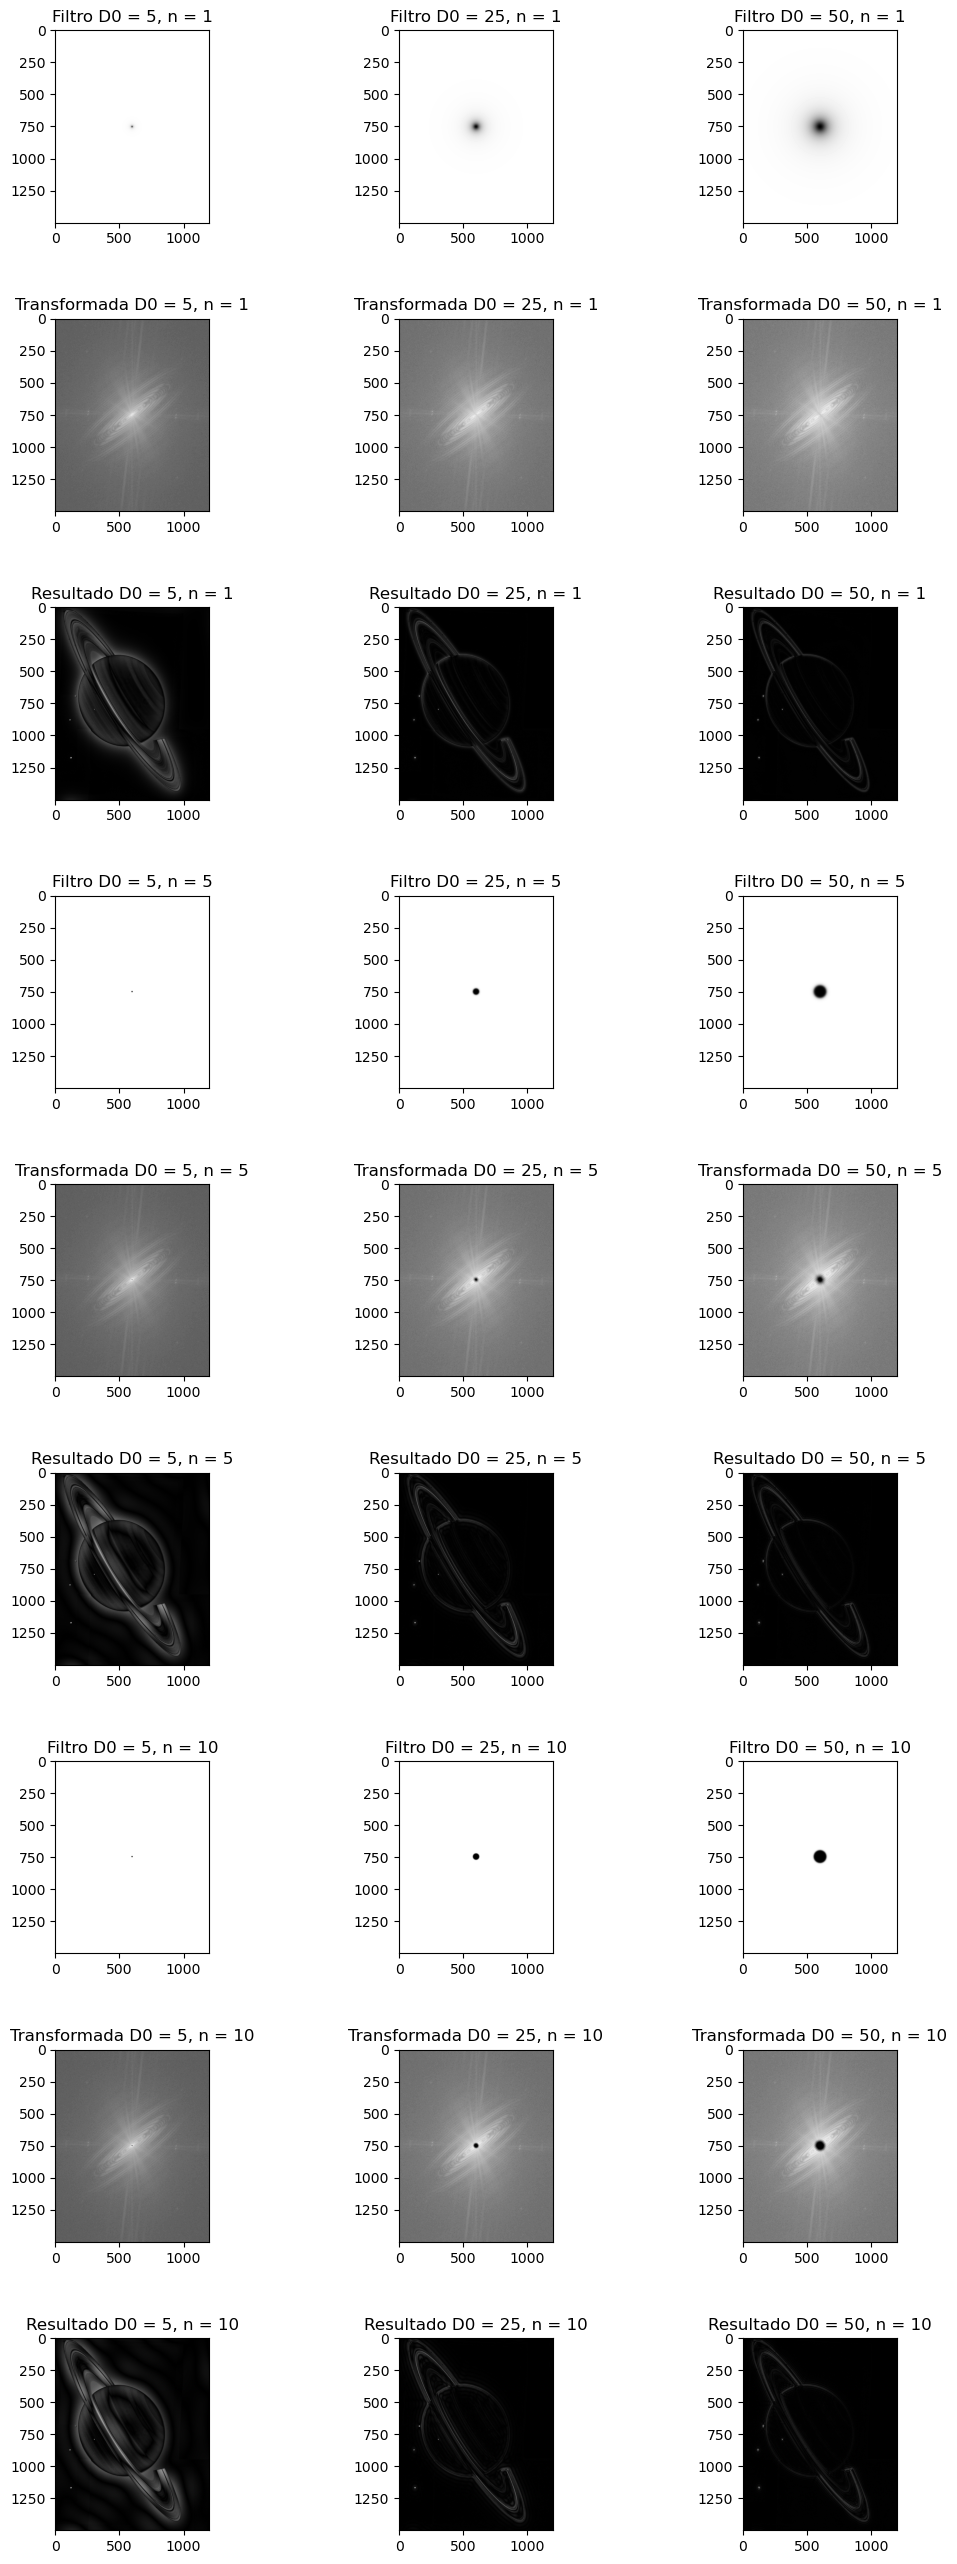

In [58]:
plt.figure(figsize=(50, 50))

img_bw_pb_5_1 = filtro_butterworth(saturno, 5, 1, 2)
img_bw_pb_25_1 = filtro_butterworth(saturno, 25, 1, 2)
img_bw_pb_50_1 = filtro_butterworth(saturno, 50, 1, 2)

img_bw_pb_5_5 = filtro_butterworth(saturno, 5, 5, 2)
img_bw_pb_25_5 = filtro_butterworth(saturno, 25, 5, 2)
img_bw_pb_50_5 = filtro_butterworth(saturno, 50, 5, 2)

img_bw_pb_5_10 = filtro_butterworth(saturno, 5, 10, 2)
img_bw_pb_25_10 = filtro_butterworth(saturno, 25, 10, 2)
img_bw_pb_50_10 = filtro_butterworth(saturno, 50, 10, 2)

plt.subplot(9,3,1)
plt.imshow(img_bw_pb_5_1[0])
plt.title('Filtro D0 = 5, n = 1')

plt.subplot(9,3,2)
plt.imshow(img_bw_pb_25_1[0])
plt.title('Filtro D0 = 25, n = 1')

plt.subplot(9,3,3)
plt.imshow(img_bw_pb_50_1[0])
plt.title('Filtro D0 = 50, n = 1')

plt.subplot(9,3,4)
plt.imshow(img_bw_pb_5_1[1])
plt.title('Transformada D0 = 5, n = 1')

plt.subplot(9,3,5)
plt.imshow(img_bw_pb_25_1[1])
plt.title('Transformada D0 = 25, n = 1')

plt.subplot(9,3,6)
plt.imshow(img_bw_pb_50_1[1])
plt.title('Transformada D0 = 50, n = 1')

plt.subplot(9,3,7)
plt.imshow(img_bw_pb_5_1[2])
plt.title('Resultado D0 = 5, n = 1')

plt.subplot(9,3,8)
plt.imshow(img_bw_pb_25_1[2])
plt.title('Resultado D0 = 25, n = 1')

plt.subplot(9,3,9)
plt.imshow(img_bw_pb_50_1[2])
plt.title('Resultado D0 = 50, n = 1')

plt.subplot(9,3,10)
plt.imshow(img_bw_pb_5_5[0])
plt.title('Filtro D0 = 5, n = 5')

plt.subplot(9,3,11)
plt.imshow(img_bw_pb_25_5[0])
plt.title('Filtro D0 = 25, n = 5')

plt.subplot(9,3,12) 
plt.imshow(img_bw_pb_50_5[0])
plt.title('Filtro D0 = 50, n = 5')

plt.subplot(9,3,13)
plt.imshow(img_bw_pb_5_5[1])
plt.title('Transformada D0 = 5, n = 5')

plt.subplot(9,3,14)
plt.imshow(img_bw_pb_25_5[1])
plt.title('Transformada D0 = 25, n = 5')

plt.subplot(9,3,15)
plt.imshow(img_bw_pb_50_5[1])
plt.title('Transformada D0 = 50, n = 5')

plt.subplot(9,3,16)
plt.imshow(img_bw_pb_5_5[2])
plt.title('Resultado D0 = 5, n = 5')

plt.subplot(9,3,17)
plt.imshow(img_bw_pb_25_5[2])
plt.title('Resultado D0 = 25, n = 5')

plt.subplot(9,3,18)
plt.imshow(img_bw_pb_50_5[2])
plt.title('Resultado D0 = 50, n = 5')

plt.subplot(9,3,19)
plt.imshow(img_bw_pb_5_10[0])
plt.title('Filtro D0 = 5, n = 10')

plt.subplot(9,3,20)
plt.imshow(img_bw_pb_25_10[0])
plt.title('Filtro D0 = 25, n = 10')

plt.subplot(9,3,21)
plt.imshow(img_bw_pb_50_10[0])
plt.title('Filtro D0 = 50, n = 10')

plt.subplot(9,3,22)
plt.imshow(img_bw_pb_5_10[1])
plt.title('Transformada D0 = 5, n = 10')

plt.subplot(9,3,23)
plt.imshow(img_bw_pb_25_10[1])
plt.title('Transformada D0 = 25, n = 10')

plt.subplot(9,3,24)
plt.imshow(img_bw_pb_50_10[1])
plt.title('Transformada D0 = 50, n = 10')

plt.subplot(9,3,25)
plt.imshow(img_bw_pb_5_10[2])
plt.title('Resultado D0 = 5, n = 10')

plt.subplot(9,3,26)
plt.imshow(img_bw_pb_25_10[2])
plt.title('Resultado D0 = 25, n = 10')

plt.subplot(9,3,27)
plt.imshow(img_bw_pb_50_10[2])
plt.title('Resultado D0 = 50, n = 10')

plt.subplots_adjust(left=0.1, right=0.3, bottom=0.1, top=0.6, wspace=0.1, hspace=0.5)

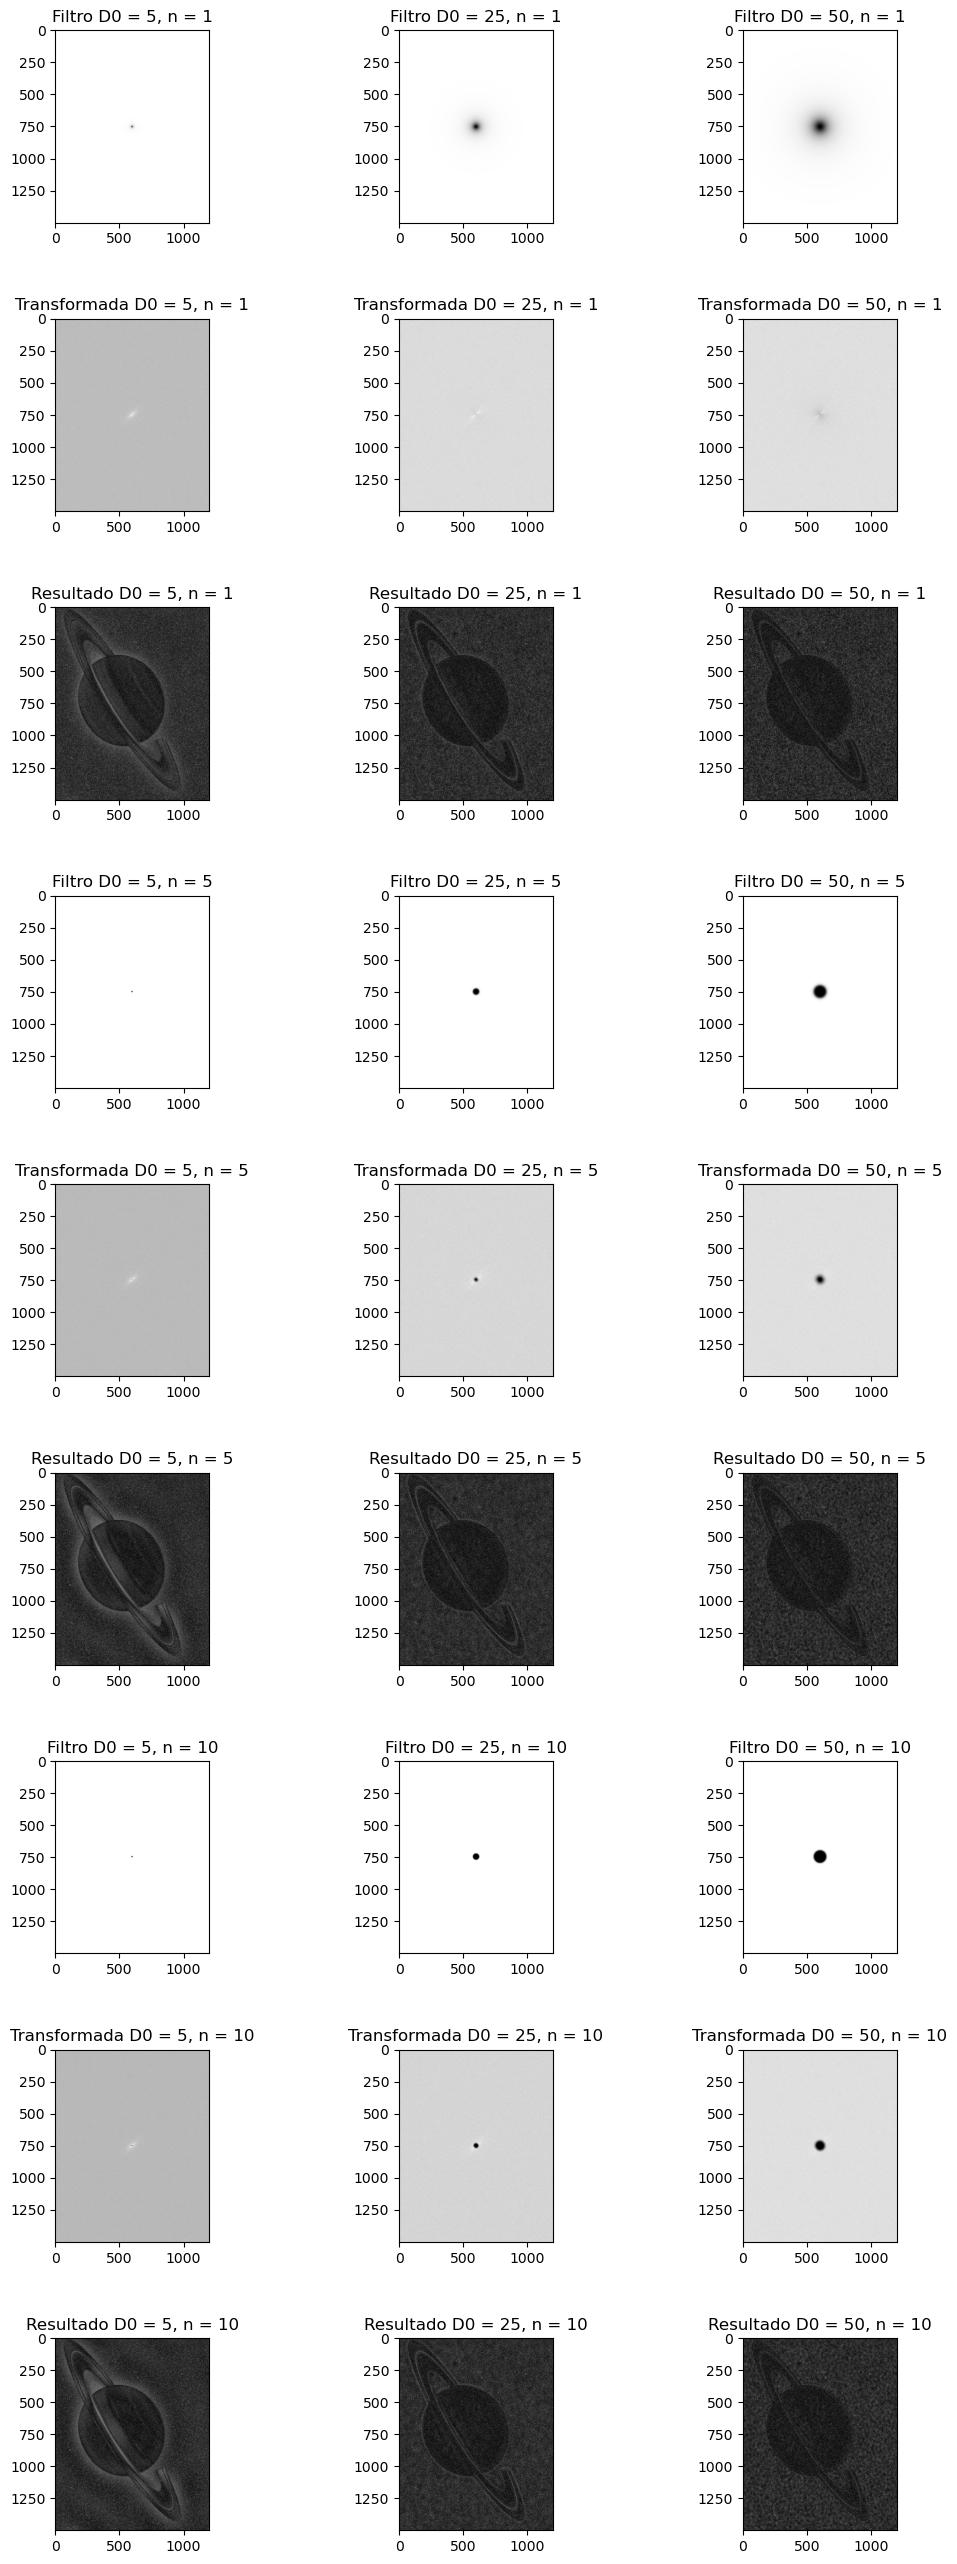

In [55]:
plt.figure(figsize=(50, 50))

img_bw_pb_5_1 = filtro_butterworth(img_sp, 5, 1, 2)
img_bw_pb_25_1 = filtro_butterworth(img_sp, 25, 1, 2)
img_bw_pb_50_1 = filtro_butterworth(img_sp, 50, 1, 2)

img_bw_pb_5_5 = filtro_butterworth(img_sp, 5, 5, 2)
img_bw_pb_25_5 = filtro_butterworth(img_sp, 25, 5, 2)
img_bw_pb_50_5 = filtro_butterworth(img_sp, 50, 5, 2)

img_bw_pb_5_10 = filtro_butterworth(img_sp, 5, 10, 2)
img_bw_pb_25_10 = filtro_butterworth(img_sp, 25, 10, 2)
img_bw_pb_50_10 = filtro_butterworth(img_sp, 50, 10, 2)

plt.subplot(9,3,1)
plt.imshow(img_bw_pb_5_1[0])
plt.title('Filtro D0 = 5, n = 1')

plt.subplot(9,3,2)
plt.imshow(img_bw_pb_25_1[0])
plt.title('Filtro D0 = 25, n = 1')

plt.subplot(9,3,3)
plt.imshow(img_bw_pb_50_1[0])
plt.title('Filtro D0 = 50, n = 1')

plt.subplot(9,3,4)
plt.imshow(img_bw_pb_5_1[1])
plt.title('Transformada D0 = 5, n = 1')

plt.subplot(9,3,5)
plt.imshow(img_bw_pb_25_1[1])
plt.title('Transformada D0 = 25, n = 1')

plt.subplot(9,3,6)
plt.imshow(img_bw_pb_50_1[1])
plt.title('Transformada D0 = 50, n = 1')

plt.subplot(9,3,7)
plt.imshow(img_bw_pb_5_1[2])
plt.title('Resultado D0 = 5, n = 1')

plt.subplot(9,3,8)
plt.imshow(img_bw_pb_25_1[2])
plt.title('Resultado D0 = 25, n = 1')

plt.subplot(9,3,9)
plt.imshow(img_bw_pb_50_1[2])
plt.title('Resultado D0 = 50, n = 1')

plt.subplot(9,3,10)
plt.imshow(img_bw_pb_5_5[0])
plt.title('Filtro D0 = 5, n = 5')

plt.subplot(9,3,11)
plt.imshow(img_bw_pb_25_5[0])
plt.title('Filtro D0 = 25, n = 5')

plt.subplot(9,3,12) 
plt.imshow(img_bw_pb_50_5[0])
plt.title('Filtro D0 = 50, n = 5')

plt.subplot(9,3,13)
plt.imshow(img_bw_pb_5_5[1])
plt.title('Transformada D0 = 5, n = 5')

plt.subplot(9,3,14)
plt.imshow(img_bw_pb_25_5[1])
plt.title('Transformada D0 = 25, n = 5')

plt.subplot(9,3,15)
plt.imshow(img_bw_pb_50_5[1])
plt.title('Transformada D0 = 50, n = 5')

plt.subplot(9,3,16)
plt.imshow(img_bw_pb_5_5[2])
plt.title('Resultado D0 = 5, n = 5')

plt.subplot(9,3,17)
plt.imshow(img_bw_pb_25_5[2])
plt.title('Resultado D0 = 25, n = 5')

plt.subplot(9,3,18)
plt.imshow(img_bw_pb_50_5[2])
plt.title('Resultado D0 = 50, n = 5')

plt.subplot(9,3,19)
plt.imshow(img_bw_pb_5_10[0])
plt.title('Filtro D0 = 5, n = 10')

plt.subplot(9,3,20)
plt.imshow(img_bw_pb_25_10[0])
plt.title('Filtro D0 = 25, n = 10')

plt.subplot(9,3,21)
plt.imshow(img_bw_pb_50_10[0])
plt.title('Filtro D0 = 50, n = 10')

plt.subplot(9,3,22)
plt.imshow(img_bw_pb_5_10[1])
plt.title('Transformada D0 = 5, n = 10')

plt.subplot(9,3,23)
plt.imshow(img_bw_pb_25_10[1])
plt.title('Transformada D0 = 25, n = 10')

plt.subplot(9,3,24)
plt.imshow(img_bw_pb_50_10[1])
plt.title('Transformada D0 = 50, n = 10')

plt.subplot(9,3,25)
plt.imshow(img_bw_pb_5_10[2])
plt.title('Resultado D0 = 5, n = 10')

plt.subplot(9,3,26)
plt.imshow(img_bw_pb_25_10[2])
plt.title('Resultado D0 = 25, n = 10')

plt.subplot(9,3,27)
plt.imshow(img_bw_pb_50_10[2])
plt.title('Resultado D0 = 50, n = 10')

plt.subplots_adjust(left=0.1, right=0.3, bottom=0.1, top=0.6, wspace=0.1, hspace=0.5)